
# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project we will analyze the TMDb movie dataset.This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I will analyse this dataset to find the answers to the following questions :-
<ul>
<li>Which movie genres are associated with high revenue?</li>
<li>How has the movie popularity changed over the years?</li>
<li>Which genre movies are more profitable?</li>
<li>Do more popular movies get more number of votes?</li>
<li> Which production companies made the maximum movies in past 60 years, and which production companies have high budget?</li>
<li>  Which production companies with significant number of movies recieve the highest avergae vote?</li>
<li> Which actors have made the maximum movies? And which actors are more likely to make a profit movie?</li>
<li> What are the average movie budget,average movie runtime and average movie revenue?
</ul>


In [1]:
# importing packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Loading the data
df = pd.read_csv('tmdb-movies.csv')
df.head() #To see how are data looks like

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Better understanding of data - Using the shape,describe() and info function

In [3]:
#shape of the dataframe
df.shape

(10866, 21)

In [4]:
#descriptionn of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df_new = df.copy()

Dropping columns which will not be used for analysis

In [7]:
df_new.drop(['overview','tagline','imdb_id','release_date','revenue','budget','homepage','keywords','original_title'],axis=1,inplace=True)

In [8]:
df_new.tail()

,id,popularity,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,0.080598,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966,0.000000,0.0
10862,20379,0.065543,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0.000000,0.0
10863,39768,0.065141,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966,0.000000,0.0
10864,21449,0.064317,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966,0.000000,0.0
10865,22293,0.035919,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,15,1.5,1966,127642.279154,0.0


In the above data we can observe budget and revenue column have value = 0.
These values need to be imputed for better analysis

Finding missing values

In [9]:
df_new.apply(lambda x: sum(x.isnull()),axis=0) # To see the number of rows with null values in each column

id                         0
popularity                 0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning 

Deleting duplicate rows

In [10]:
sum(df_new.duplicated()) #Checking for duplicate rows

1

In [11]:
df_new=df_new.drop_duplicates() #dropping the duplicate rows

#### Handling the missing values
<ul>
    <li>Replacing the zero values in budget_adj and revenue_adj column with mean of the column</li>
    <li>Dropping the rows with null values</li>

In [12]:
cols= ['budget_adj','revenue_adj'] #filling the 0 values in budget and revenue column by mean of their columns respectively
for c in cols:
    df_new[c] = df_new[c].replace(0,np.NaN)
    df_new[c].fillna(df_new[c].mean(),inplace=True) 

In [13]:
df_new = df_new.dropna() #dropping rows with null values

In [14]:
rows_dropped =df.shape[0]-df_new.shape[0]
rows_dropped

1094

In [15]:
df_new.apply(lambda x: sum(x.isnull()),axis=0) #conforming that there are no null values

id                      0
popularity              0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [16]:
#Creating a new column 'profit' 
df_new['profit'] = df_new['revenue_adj'] > df_new['budget_adj']

In [17]:
df_new['profit'].isnull().any()

False

#### Now the data is clean and can be used for analysis

In [18]:
df_split_genre = df_new.copy()

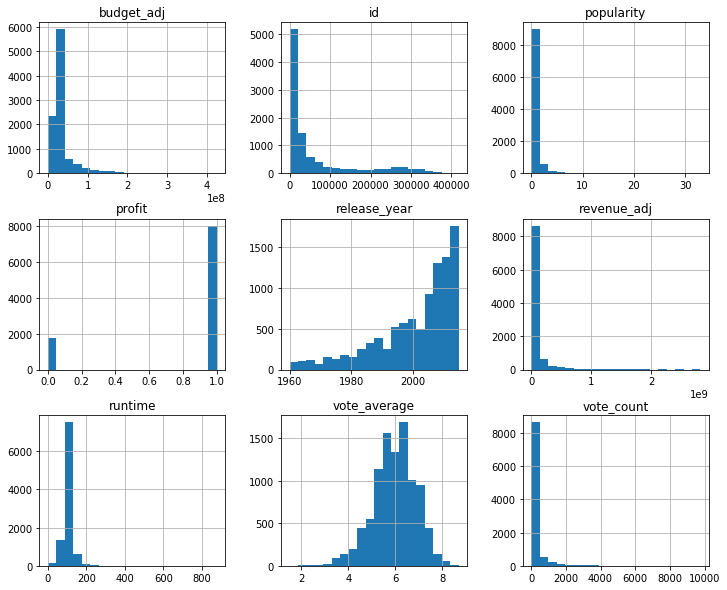

In [19]:
df_new.hist(bins=20,figsize=(12,10)); #Analysing the distribution of data through visuals

From the above analysis we can infer the following:
<ai>
    <li>Number of movies made have increased over the years</li>
    <li>Maximum movies have a vote_average between 5-7 </li>
    <li>Runtime of maximum movies is between 100-150 minutes </li>
</ai>

Creating multiple rows for genre column with multiple entries 
#### This DataFrame will be used for genre specific problems.

In [20]:
s = df_split_genre["genres"].str.split('|').apply(pd.Series,1).stack()
s.index = s.index.droplevel(-1)
s.name = "genre"
pd.DataFrame(s,columns=['genre'])
df_split_genre =df_split_genre.join(s)
del df_split_genre['genres']

In [21]:
df_split_genre.shape

(24650, 13)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Which is the most common movie Genre and Which Genres genrate highest revenue?

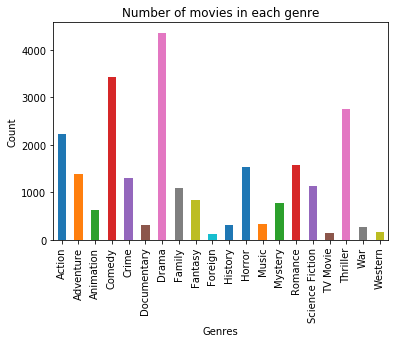

In [22]:
#Grouping the dataset by genre column and calculating the number of movies and revenue generated in each genre
genre_revenue_count = df_split_genre.groupby('genre').agg({'id':'count','revenue_adj':'mean'})

genre_revenue_count.columns = ['Genre_Count','Average Revenue']   #Adding column name

#plotting genre vs number of movies
genre_revenue_count['Genre_Count'].plot(kind='bar')

#adding labels
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Number of movies in each genre');

#### The most common movie genre is Drama followed by Comedy and Thriller.

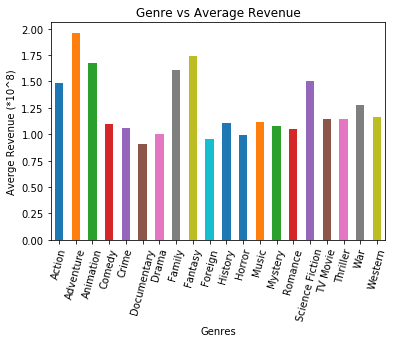

In [23]:
#plotting genre vs average revenue
(genre_revenue_count['Average Revenue']/(10**8)).plot(kind='bar')

#Adding labels
plt.xticks(rotation=75)
plt.xlabel('Genres')
plt.ylabel('Averge Revenue (*10^8)')
plt.title('Genre vs Average Revenue');

#### From the above bar plot we can see that Adventure, Action, Animation, Fantasy and Science Fiction are some genres which genrate higher revenue on an average while Documentary and horror movies generate low revenue

### Research Question 2: Which genre movies are profitable?

In [24]:
profit_by_genre = df_split_genre.groupby(['genre','profit'])['id'].count()

In [25]:
profit_by_genre.groupby(level=[0]).apply(lambda x: x / x.sum())

genre            profit
Action           False     0.183893
                 True      0.816107
Adventure        False     0.159682
                 True      0.840318
Animation        False     0.106969
                 True      0.893031
Comedy           False     0.172444
                 True      0.827556
Crime            False     0.205543
                 True      0.794457
Documentary      False     0.170347
                 True      0.829653
Drama            False     0.218607
                 True      0.781393
Family           False     0.112329
                 True      0.887671
Fantasy          False     0.161905
                 True      0.838095
Foreign          False     0.175000
                 True      0.825000
History          False     0.189542
                 True      0.810458
Horror           False     0.132372
                 True      0.867628
Music            False     0.227139
                 True      0.772861
Mystery          False     0.223803
    

#### From the above observation it can be inferred that for all generes 75-80% movies give profit except TV Movie where all 1051 movies gave profit.

### Research Question 3: Do movies with higher vote count have high popularity?

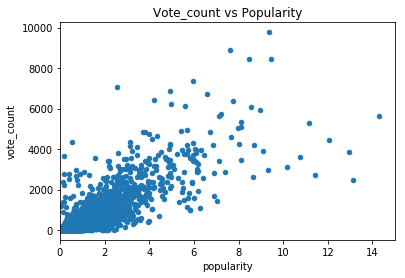

In [26]:
df_new.plot(y='vote_count',x='popularity',kind='scatter') #Scatter plot of vote_count and popularity

#Adding Title
plt.title('Vote_count vs Popularity')

#Setting the range of s-axis
plt.xlim((0,15));

#### From the scatter plot it is clear that more popular movies recieve higher number of votes

### Research Question 4:How has the popularity changed over the years?

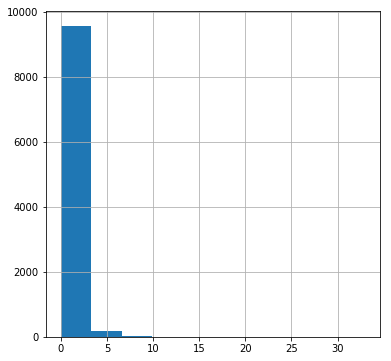

In [27]:
df_new['popularity'].hist(figsize=(6,6)) #distribution of popularity

In [28]:
#Grouping the relaese year under the decade range
bins =[1960,1970,1980,1990,2000,2015]
labels =['1960-1970','1970-1980','1980-1990','1990-2000','2000+']

#Creating a new column 'year'
df_new['year'] = pd.cut(df_new.release_year,bins=bins,labels =labels,include_lowest=True)

#Grouping the years to analyze the change in popularity over the years
popularity_by_year = df_new.groupby('year')['popularity'].mean()

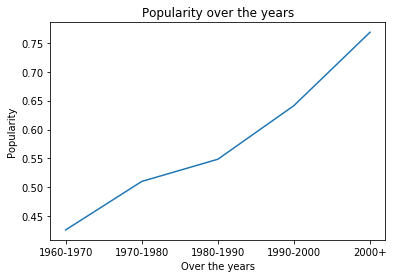

In [29]:
#Plotting popularity change over the years
popularity_by_year.plot(kind='line')

#Adding labels
plt.ylabel('Popularity')
plt.xlabel('Over the years')
plt.title('Popularity over the years')
locations = np.arange(5)
plt.xticks(locations,labels);

In [30]:
df_new.groupby('year')['id'].count() #Number of movies made in a decade

year
1960-1970     387
1970-1980     524
1980-1990    1048
1990-2000    1742
2000+        6071
Name: id, dtype: int64

#### Popularity and the number of movies made every year have continuously increased over the years.

### Production Specific analysis

In [31]:
df_split_production = df_new.copy()

 Creating multiple rows for production_companies column with multiple entries 
#### This DataFrame will be used for production specific problems.

In [32]:
t = df_split_production["production_companies"].str.split('|').apply(pd.Series,1).stack()
t.index = t.index.droplevel(-1)
t.name = "production"
pd.DataFrame(t,columns=['production'])
df_split_production =df_split_production.join(t)
del df_split_production['production_companies']

In [33]:
df_split_production.shape #Shape after splitting by production companies

(23143, 14)

### Research Question 5:  Which production companies made the maximum movies in past 60 years, and which production companies have high budget?

In [34]:
#Grouping the data by production to calculate number of movies made by a production,their averge budget,average revenue 
#andpercentage of profitable movies 
production_budget_count = df_split_production.groupby('production').agg({'id':'count','budget_adj':'mean','revenue_adj':'mean','profit':'mean'})

#Naming the columns
production_budget_count.columns =['count','budget_mean','revenue_mean','percent_profit_movies']

#Sorting the values by number of movies per production
production_count_desc = production_budget_count.sort_values(['count'],ascending=False)

#Sorting the values by budget
production_budget_desc = production_budget_count.sort_values(['budget_mean'],ascending=False)


production_count_desc.query('count>100' )

,count,budget_mean,revenue_mean,percent_profit_movies
production,,,,
Universal Pictures,522,4.794349e+07,1.532101e+08,0.825670
Warner Bros.,509,5.871969e+07,1.698861e+08,0.817289
Paramount Pictures,431,5.056451e+07,1.635176e+08,0.837587
Twentieth Century Fox Film Corporation,282,5.549552e+07,2.081310e+08,0.868794
Columbia Pictures,272,5.623128e+07,1.514852e+08,0.860294
New Line Cinema,219,4.198514e+07,1.311266e+08,0.812785
Metro-Goldwyn-Mayer (MGM),218,4.188198e+07,1.364743e+08,0.784404
Walt Disney Pictures,213,6.935539e+07,2.192937e+08,0.920188
Touchstone Pictures,178,4.966909e+07,1.256124e+08,0.752809


####  All production companies with 100+ movies have made more than 75% of profitable movies. Walt Disney made 213 movies out of which 92% movies made profit

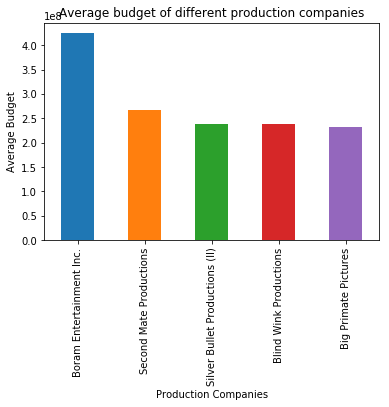

In [35]:
#plotting the budget average of a production
production_budget_desc['budget_mean'][:5].plot(kind='bar')

#Adding labels
plt.title('Average budget of different production companies')
plt.xlabel('Production Companies')
plt.ylabel('Average Budget');

In [36]:
df.query('production_companies =="Boram Entertainment Inc."') #movie with highest budget

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,425000000.0,11087569.0


#### Boram Entertainment Inc. produced the movie with highest budget and no profits

In [37]:
#number of movies made by each production
production_count_desc['count'][:5]

production
Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
Name: count, dtype: int64

#### Universal Pictures, Warner Bros and Paramount Pictures have made more than 400 movies over the years

### Research Question 6: Which production companies with significant number of movies recieve the highest avergae vote?

In [38]:
#Grouping the movies by production to calculate the average rating recieved by each 
vote_by_production = df_split_production.groupby('production').agg({'id':'count','vote_average':'mean'})

#Labelling the columns
vote_by_production.columns = ['Count','Vote_Average']

#Sorting the values according to the vote_average
vote_desc = vote_by_production.sort_values('Vote_Average',ascending=False)

vote_desc.query('Count>10 & Vote_Average >7')

,Count,Vote_Average
production,,
Heyday Films,18,7.066667
Pixar Animation Studios,44,7.020455


In [39]:
df_split_production.query('production=="Heyday Films"')['profit'].value_counts() #Number of movies by "Heyday Films"  that made a profit

True     17
False     1
Name: profit, dtype: int64

#### Heyday Films have made 18 movies in which 17 were profitable with avergae vote as 7.06

In [40]:
df_split_production.query('production=="Pixar Animation Studios"')['profit'].value_counts()

True    44
Name: profit, dtype: int64

#### Pixar Animation Studios have made 44 movies with no loss and a vote average of 7.02

### Cast Specific Analysis

 Creating multiple rows for cast column with multiple entries 
#### This DataFrame will be used for cast specific analysis

In [41]:
df_split_cast = df_new.copy()

In [42]:
c = df_split_cast["cast"].str.split('|').apply(pd.Series,1).stack()
c.index = c.index.droplevel(-1)
c.name = "cast_new"
pd.DataFrame(c,columns=['cast_new'])
df_split_cast =df_split_cast.join(c)
del df_split_cast['cast']

### Research Question 7: Which cast has acted in most movies? Which cast movies are more likely to give profit?

In [43]:
#Grouping the movies by cast
cast_movie_count = df_split_cast.groupby('cast_new').agg({'id':'count','profit':'mean'})

#Naming columns
cast_movie_count.columns = ['Movie_Count','percentage_profit_movies']

#Sorting data with number of movies made by each actor
cast_movies_desc = cast_movie_count.sort_values('Movie_Count',ascending=False)

cast_movies_desc.query('percentage_profit_movies>0.90 & Movie_Count > 30')

,Movie_Count,percentage_profit_movies
cast_new,,
Tom Hanks,46,0.978261
Jeff Bridges,39,0.923077
Cameron Diaz,38,0.947368
Jack Nicholson,37,0.918919
Tom Cruise,37,0.945946
Pierce Brosnan,34,0.911765
Brian Cox,33,0.909091
William Hurt,32,0.906250


#### From this analysis we can say that Tom Hanks have made 46 movies and 97% of which gave profit
#### Tom Cruise and Cameron Diaz have made 37 and 38 movies respctively  and around 94% of them gave a profit

In [44]:
cast_movies_desc[:10]

,Movie_Count,percentage_profit_movies
cast_new,,
Robert De Niro,72,0.708333
Samuel L. Jackson,70,0.742857
Bruce Willis,62,0.758065
Nicolas Cage,61,0.704918
Michael Caine,52,0.865385
Robin Williams,51,0.823529
Morgan Freeman,49,0.755102
John Goodman,48,0.770833
John Cusack,48,0.729167


#### From the above analysis we can say that Robert De Niro,Samuel L. Jackson, Bruce Wills, Nicolas Cage, Michael Caine and Robin Williams have acted in more than 50 movies

#### Other Analysis

### Research Question 8:What are the average movie budget,average movie runtime and average movie revenue?

In [45]:
df_new['budget_adj'].mean() #Average budget used by movies

37350903.183765404

In [46]:
df_new['revenue_adj'].mean() #Average revenue generated by movies

116205432.8325628

In [47]:
df_new['runtime'].mean() #Average runtime of movies

102.92662709783053

#### Other Analysis
<ul>
    <li> Average budget = \$37350903.18 </li>
    <li> Average revenue = \$116205432.832 </li>
    <li> Average runtime = 102 minutes </li>
</ul>

<a id='conclusions'></a>
## Conclusions
<ul>
    <li>The most common movie genre is Drama followed by Comedy and Thriller.</li>
    <li>Adventure, Action, Animation, Fantasy and Science Fiction are some genres which genrate higher revenue on an average while Documentary and horror movies generate low revenue.</li>
    <li>75-80% of all movies give profit irrespective of the genre except TV Movie where all 1051 movies gave profit.</li>
    <li>More popular movies recieve higher number of votes.</li>
    <li>Popularity and the number of movies made every year have continuously increased over the years.</li>
    <li>Walt Disney made 213 movies out of which 92% movies made profit.</li>
    <li>'The Warrior's way' was the highest budget movie with no profit.</li>
    <li>Universal Pictures, Warner Bros and Paramount Pictures have made more than 400 movies over the years.</li>
    <li>Pixar Animation Studios have made 44 movies with no loss and a vote average of 7.02</li>
    <li>Tom Hanks have made 46 movies and 97% of which gave profit.</li>
    <li>Robert De Niro,Samuel L. Jackson, Bruce Wills, Nicolas Cage, Michael Caine and Robin Williams are spome actors who have been casted in more than 50 movies</li>
</ul>
    



<a id='limitations'></a>
## Limitations
<ul>
    <li>1094 out 0f 10866 rows are dropped for the analysis.</li>
    <li>Some columns are dropped which might be useful for the analysis </li>
    <li>Profit margin is calculated specifically.</li>
    <li>Revenue and budget are assumed to be in dollars. </li>
    <li>The rows in budget and revenue column are imputed by mean of the columns respectively</li>
</ul>